In [ ]:
### Ensemble 8
### Timespan: 10000 years
### Timestep: 1 year
### 360 runs
### No prokaryotes, try to find reference scenarios that give the right distribution of ligands and iron
### Parameters that are varied: ligand lifetime, ligphi, deep box lifetime factor
### beta = 12

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import matplotlib as mpl
from matplotlib.colors import ListedColormap
plt.rcParams['text.usetex'] = True

# Enable the use of LaTeX for rendering text labels
mpl.rcParams['text.usetex'] = True

# Set the font family to sans-serif (Helvetica, Arial, etc.)
mpl.rcParams['font.family'] = 'sans-serif'

# Set the font style for the labels (optional)
mpl.rcParams['font.style'] = 'normal'

# Add a LaTeX preamble to change font family for numbers to sans-serif
mpl.rcParams['text.latex.preamble'] = r'\usepackage{sfmath}'


os.getcwd()

'c:\\Users\\konst\\Documents\\_Master_Thesis\\Code\\microCOSM_deep\\Ensemble8'

In [2]:
data = pd.read_csv('Ensemble8_noprokaryotes.csv', sep=' ')

In [3]:
data.head()

,id,dt(s),t(yr),rFeC_pb,mu0,m_l,m_q,kappa,kfe_p,kldoc_p,...,DIC(2),DIC(3),ALK(1),ALK(2),ALK(3),OCPCO2(1),OCPCO2(2),OCPCO2(3),ATPCO2,Limit
0,35000.0,86400.0,10000.0,0.00004,0.0,1.157407e-08,0.0,0.0,0.000001,0.001025,...,2114.004849,2210.976979,2399.529524,2395.303780,2399.540988,273.454590,280.715325,198.058412,0.0,333.0
1,35001.0,86400.0,10000.0,0.00004,0.0,1.157407e-08,0.0,0.0,0.000001,0.001025,...,2114.004525,2210.993154,2399.529187,2395.303364,2399.540992,273.455350,280.715155,198.079455,0.0,333.0
2,35002.0,86400.0,10000.0,0.00004,0.0,1.157407e-08,0.0,0.0,0.000001,0.001025,...,2114.004130,2211.015584,2399.528768,2395.302846,2399.540997,273.456494,280.714954,198.108641,0.0,333.0
3,35003.0,86400.0,10000.0,0.00004,0.0,1.157407e-08,0.0,0.0,0.000001,0.001025,...,2114.001050,2211.197725,2399.525478,2395.298782,2399.541035,273.466011,280.713415,198.345860,0.0,333.0
4,35004.0,86400.0,10000.0,0.00004,0.0,1.157407e-08,0.0,0.0,0.000001,0.001025,...,2113.997375,2211.425085,2399.521523,2395.293897,2399.541081,273.478179,280.711607,198.642521,0.0,333.0


In [4]:
data.shape

(360, 45)

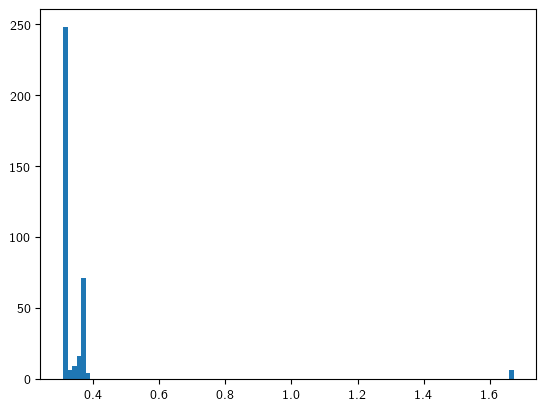

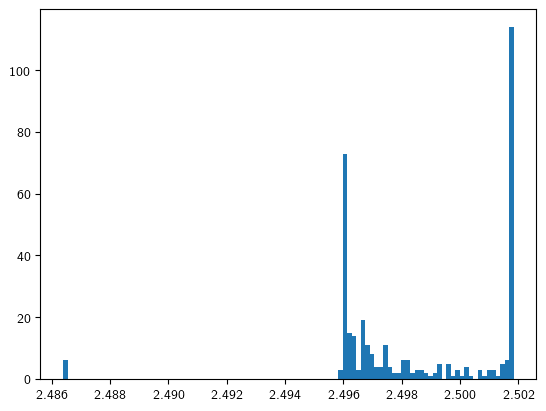

In [5]:
### Look at the distribution of PO4(2), PO4(3)

plt.hist(data['PO4(2)'], bins=100)
plt.show()

plt.hist(data['PO4(3)'], bins=100)
plt.show()



In [6]:
### Select all the runs that have Lig(1), Lig(2), Lig(3) bigger than 0.5 and smaller than 6

data_sel = data[(data['Lig(1)'] > 0.5) & (data['Lig(2)'] > 0.5) & (data['Lig(3)'] > 0.5)]
data_sel = data_sel[(data_sel['Lig(1)'] < 6) & (data_sel['Lig(2)'] < 6) & (data_sel['Lig(3)'] < 6)]
data_sel.shape

(57, 45)

Text(0.5, 1.0, 'Fe(1) distribution')

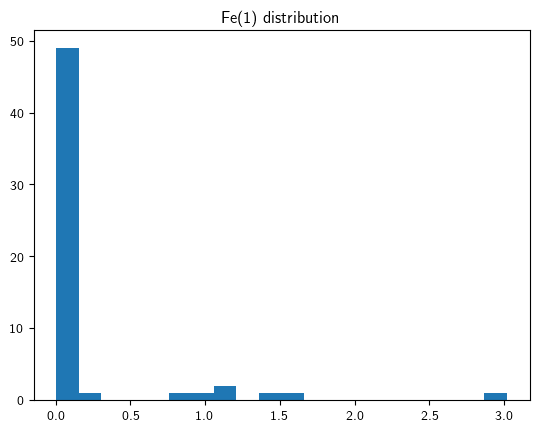

In [7]:
### Look at distribtution of Fe(1)

plt.hist(data_sel['Fe(1)'], bins=20)
plt.title('Fe(1) distribution')

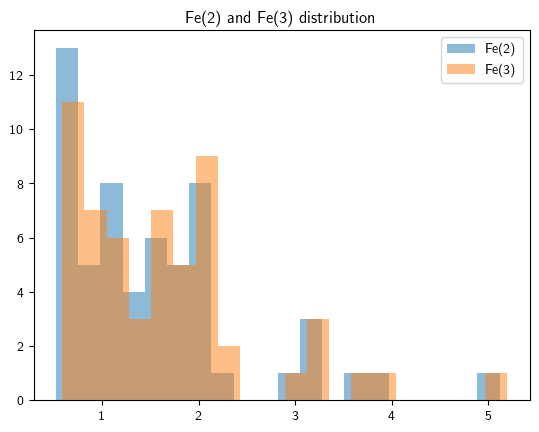

In [8]:
### Look at distribution of Fe(2) and Fe(3) in one histogram

plt.hist(data_sel['Fe(2)'], bins=20, alpha=0.5, label='Fe(2)')
plt.hist(data_sel['Fe(3)'], bins=20, alpha=0.5, label='Fe(3)')
plt.title('Fe(2) and Fe(3) distribution')
plt.legend()

### Deep Fe is shifted to higher values
### Much higher Fe values than in the scenario with beta = 9

In [9]:
### Select all the runs that have Fe(3) bigger than 0.2 and smaller than 2

data_sel = data_sel[(data_sel['Fe(3)'] > 0.2) & (data_sel['Fe(3)'] < 2)]
data_sel.shape

(39, 45)

In [10]:
print('Ligphi', data_sel['ligphi'].value_counts(normalize=True))
print('Ligand lifetime', data_sel['lt_lifet'].value_counts(normalize=True))
print('Deep box lifetime factor', data_sel['lt_deepf'].value_counts(normalize=True))


Ligphi 5.000000e-06    0.153846
1.000000e-06    0.153846
1.000000e-07    0.153846
5.000000e-07    0.153846
1.000000e-05    0.128205
1.000000e-08    0.128205
5.000000e-08    0.102564
5.000000e-05    0.025641
Name: ligphi, dtype: float64
Ligand lifetime 3.153600e+10    0.307692
3.153600e+09    0.230769
1.576800e+09    0.179487
3.153600e+08    0.128205
1.576800e+08    0.102564
3.153600e+07    0.051282
Name: lt_lifet, dtype: float64
Deep box lifetime factor 100.0     0.282051
50.0      0.256410
1000.0    0.230769
10.0      0.153846
5.0       0.051282
1.0       0.025641
Name: lt_deepf, dtype: float64


In [11]:
### Provide the id of the selected runs and print them out in a readable format

print(data_sel['id'].values)

[35041. 35046. 35094. 35095. 35099. 35100. 35149. 35153. 35154. 35159.
 35160. 35197. 35201. 35202. 35203. 35207. 35208. 35212. 35245. 35251.
 35256. 35257. 35261. 35262. 35266. 35267. 35272. 35302. 35303. 35304.
 35305. 35308. 35309. 35310. 35313. 35314. 35315. 35319. 35324.]


In [12]:
from sklearn_extra.cluster import KMedoids

# Extract input data
X = data_sel[['ligphi', 'lt_lifet', 'lt_deepf']].values

num_clusters = 5

kmedoids = KMedoids(n_clusters=num_clusters, random_state=0).fit(X)

medoid_indices = kmedoids.medoid_indices_

representative_sets = pd.DataFrame(X[medoid_indices], columns=['ligphi', 'lt_lifet', 'lt_deepf'])


c:\Users\konst\anaconda3\envs\env_MT\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "
c:\Users\konst\anaconda3\envs\env_MT\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:275: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
c:\Users\konst\anaconda3\envs\env_MT\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:275: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  warnings.warn(


In [13]:
medoid_indices

array([18, 29,  8, 25, 24], dtype=int64)

In [14]:
print(representative_sets)

         ligphi      lt_lifet  lt_deepf
0  1.000000e-08  3.153600e+09    1000.0
1  1.000000e-08  3.153600e+10     100.0
2  5.000000e-06  3.153600e+08     100.0
3  1.000000e-06  3.153600e+09      50.0
4  1.000000e-06  3.153600e+09      10.0


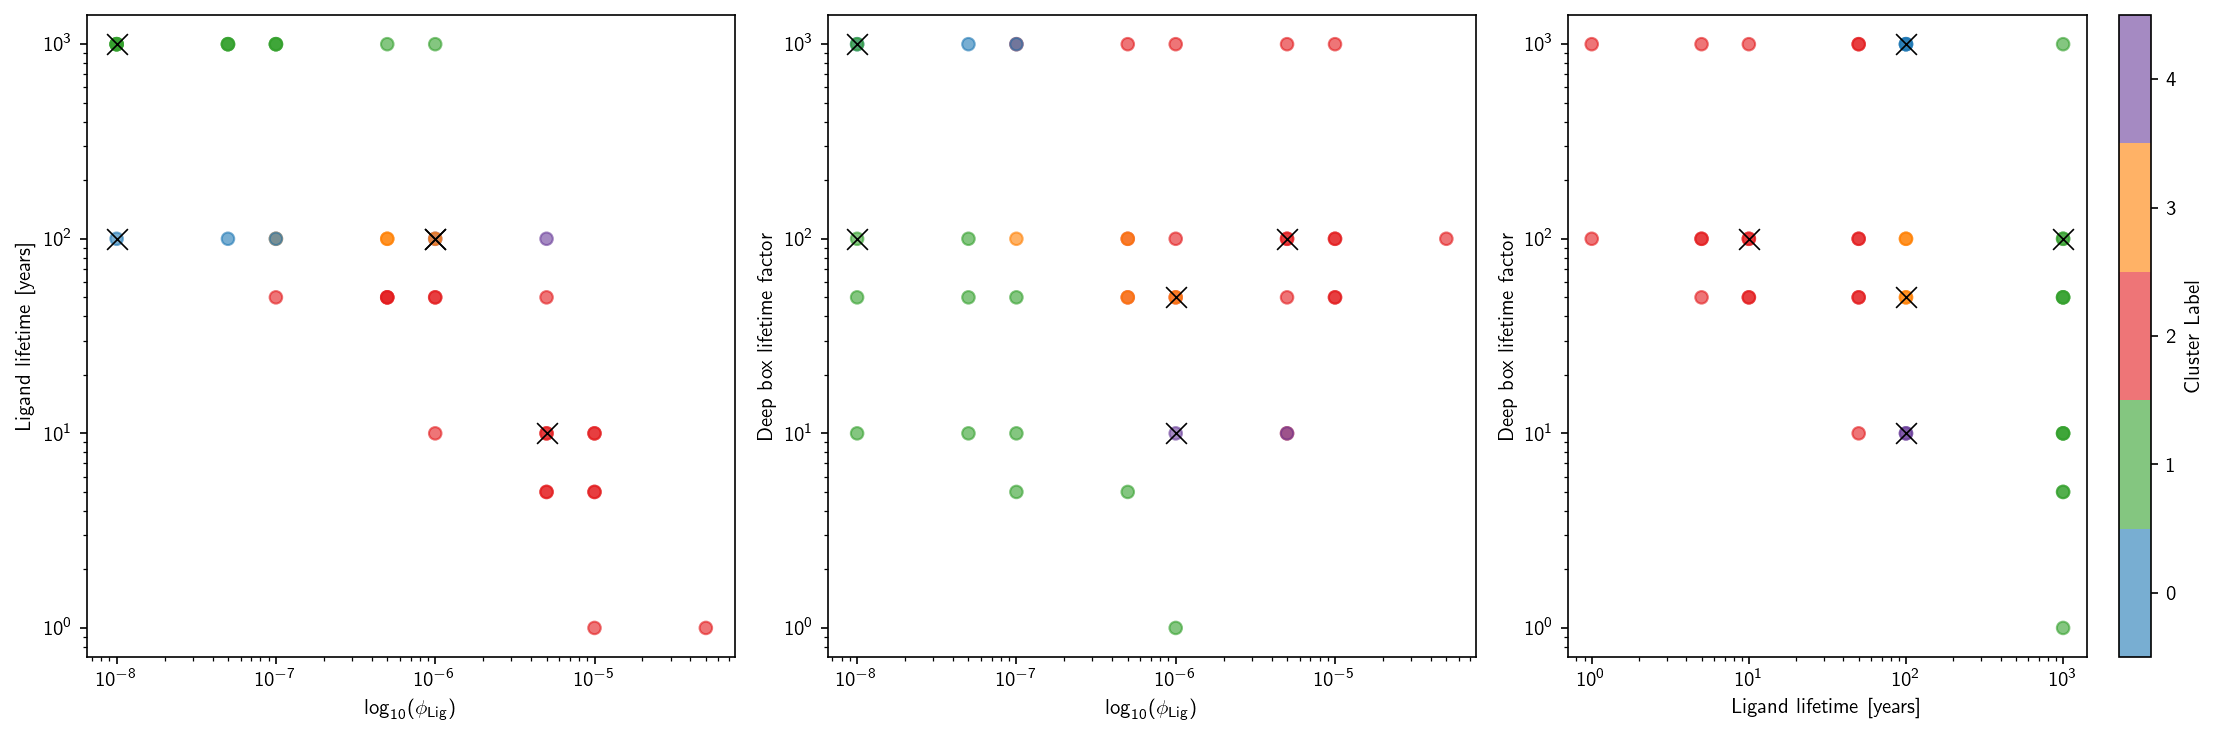

In [15]:

# Assuming kmedoids.labels_ contains the cluster labels

# Create a custom colormap with 5 visually attractive colors
custom_cmap = ListedColormap(['#1f78b4', '#33a02c', '#e31a1c', '#ff7f00', '#6a3d9a'])

# Create a figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5), dpi=150)

# Initialize an empty list to store legend handles and labels
legend_handles = []

# Plot for 'ligphi' vs 'lt_lifet'
scatter1 = axs[0].scatter(data_sel['ligphi'], np.array(data_sel['lt_lifet']/(86400 * 365)), c=kmedoids.labels_, cmap=custom_cmap, vmin=0, vmax=4, alpha=0.6)
representatives1 = axs[0].scatter(representative_sets['ligphi'], np.array(representative_sets['lt_lifet']/(86400 * 365)), c='k', marker='x', s=100, alpha=1, linewidths=0.8, zorder=1)
legend_handles.append(representatives1)
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel(r'$\log_{10}(\phi_\mathsf{Lig})$')
axs[0].set_ylabel('Ligand lifetime [years]')

# Plot for 'ligphi' vs 'lt_deepf'
scatter2 = axs[1].scatter(data_sel['ligphi'], data_sel['lt_deepf'], c=kmedoids.labels_, cmap=custom_cmap, vmin=0, vmax=4, alpha=0.6)
representatives2 = axs[1].scatter(representative_sets['ligphi'], representative_sets['lt_deepf'], c='k', marker='x', s=100, alpha=1, linewidths=0.8, zorder=1)
legend_handles.append(representatives2)
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel(r'$\log_{10}(\phi_\mathsf{Lig})$')
axs[1].set_ylabel('Deep box lifetime factor')

# Plot for 'lt_lifet' vs 'lt_deepf'
scatter3 = axs[2].scatter(np.array(data_sel['lt_lifet']/(86400 * 365)), data_sel['lt_deepf'], c=kmedoids.labels_, cmap=custom_cmap, vmin=0, vmax=4, alpha=0.6)
representatives3 = axs[2].scatter(np.array(representative_sets['lt_lifet']/(86400 * 365)), representative_sets['lt_deepf'], c='k', marker='x', s=100, alpha=1, linewidths=0.8, zorder=1)
legend_handles.append(representatives3)
axs[2].set_xscale('log')
axs[2].set_yscale('log')
axs[2].set_xlabel('Ligand lifetime [years]')
axs[2].set_ylabel('Deep box lifetime factor')

# Add colorbar with 5 colors on the side
cbar = plt.colorbar(scatter1, ax=axs[2], ticks=np.arange(5), boundaries=np.arange(-0.5, 5.5, 1), pad=0.05)
cbar.set_label('Cluster Label')

# Adjust layout
plt.tight_layout()

# Save or show the plot
plt.savefig('representative_sets_ensemble7.pdf', dpi=300, bbox_inches='tight')
plt.savefig('representative_sets_ensemble7.png', dpi=300, bbox_inches='tight')
plt.show()

